<a href="https://colab.research.google.com/github/gachet/000mis-colabs/blob/master/Regresion_lineal_multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal multivariable 



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Datos y variables
En este ejemplo encontraremos una ecuación lineal que relacione la tensión diastólica en función de la edad y el peso en Kg. La ecuación sería de la forma $$tensión = \beta_{1}*edad+\beta_{2}*peso+\beta_{3}$$
Debemos encontrar $\beta_{1}\,\,\,\beta_{2}\,\,\,\beta_{3}$
Utilizaremos el método de las ecuaciones normales

In [0]:
# x1 edad
# x2 peso
# y tensión arterial diastólica

x1_orig=np.array([18,24,12,30,30,22])
x2_orig=np.array([23.58,18.14,18.14,21.77,14.51,7.25])
y_orig=np.array([144,142,124,64,96,92])
unos = np.ones(len(x1_orig))
x1 = x1_orig.reshape(-1,1)
x2 = x2_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = unos.reshape(-1,1)
print('vector X1 vector x2  vector Y')
for i in range(0,len(x1_orig)):
    print('%4.3f\t'%(x1[i]),'%4.2f\t'%(x2[i]), '%4.2f'%(y[i]))

vector X1 vector x2  vector Y
18.000	 23.58	 144.00
24.000	 18.14	 142.00
12.000	 18.14	 124.00
30.000	 21.77	 64.00
30.000	 14.51	 96.00
22.000	 7.25	 92.00


In [0]:
# Formamos la matriz A con la 2da y tercera columna de datos mas una columa de 1s)
m = len(x1)
A = np.column_stack((x1,x2,unos))
print('A: \n')
print(A)

A: 

[[18.   23.58  1.  ]
 [24.   18.14  1.  ]
 [12.   18.14  1.  ]
 [30.   21.77  1.  ]
 [30.   14.51  1.  ]
 [22.    7.25  1.  ]]


#### Resolvemos la ecuación normal para encontrar los coeficientes 

In [0]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,y))
print('coeficientes: \n')
beta1 = c[0]
beta2 = c[1]
beta3 = c[2]
print('beta1,beta2,beta3: \n\n',beta1,beta2,beta3)

coeficientes: 

beta1,beta2,beta3: 

 [-2.73149134] [1.28029369] [150.185543]


$\beta_{1} = -2.7314$<br>
$\beta_{2} = 1.28029$<br>
$\beta_{3} = 150.1854$<br>
Ecuación encontrada &nbsp;&nbsp;&nbsp;$tensión = -2.7314*edad+1.28029*peso+150.1855$

In [0]:
y_calc = beta1*x1+beta2*x2+beta3
y_calc

array([[131.20802406],
       [107.85427831],
       [140.63217444],
       [ 96.11279635],
       [ 86.81786415],
       [ 99.3748627 ]])

In [0]:
suma_errores_cuad = np.sum((y-y_calc)**2)
suma_errores_cuad

2776.126092645907

#### gráfica del plano

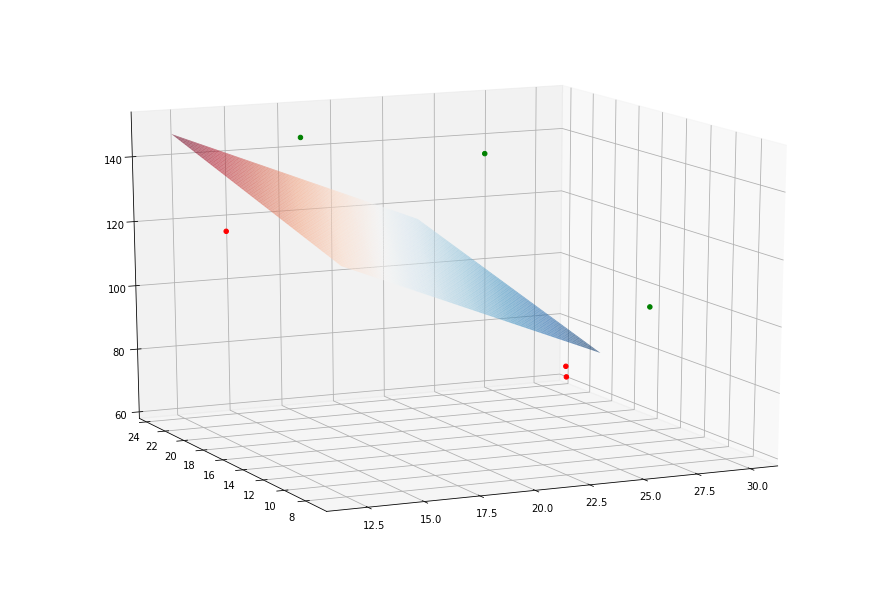

In [0]:
# Create 3D plot
xx1, xx2 = np.meshgrid(np.linspace(x1.min(), x2.max(), 100), np.linspace(x2.min(), x2.max(), 100))

# plot hyperplane
Z =   beta1 * xx1 + beta2 * xx2 + beta3

# create 3D Axis for plot
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=1)

# residuals
resid = y - y_calc


ax.scatter(x1[resid >= 0], x2[resid >= 0], y[resid >= 0], c='green', alpha=1.0, facecolor='white')
ax.scatter(x1[resid < 0], x2[resid < 0], y[resid < 0], c='red', alpha=1.0)

plt.show()